In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Using TensorFlow backend.


In [2]:
print(os.listdir(str(os.getcwd())+'/Datasets'))

['.DS_Store', 'test', 'PetImages', 'train']


In [3]:
# Defining constants for Image generator
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

In [4]:
# Extracting the Image Data
filename = os.listdir(str(os.getcwd())+'/Datasets/train')
categories = []
data ={}
for file in filename:
    category = file.split('.')[0]
    if category == 'cat':
        categories.append(0)
    elif category == 'dog':
        categories.append(1)
    data
        
df = pd.DataFrame({'file': filename, 'category': categories})
df.head(8)

,file,category
0,dog.8011.jpg,1
1,cat.5077.jpg,0
2,dog.7322.jpg,1
3,cat.2718.jpg,0
4,cat.10151.jpg,0
5,cat.3406.jpg,0
6,dog.1753.jpg,1
7,cat.4369.jpg,0


In [5]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

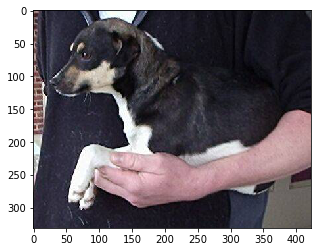

In [6]:
sample = random.choice(filename)
image = load_img(str(os.getcwd())+'/Datasets/train/'+sample)
plt.imshow(image)

In [7]:
# Building the model
model = Sequential()

#Layer 1 
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNEL)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#Layer 2
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#Layer 3
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#layer 4
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#layer 5
model.add(Dense(2, activation = 'sigmoid'))

W0823 19:28:14.432377 4680984000 deprecation_wrapper.py:119] From /Users/georgeboben/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 19:28:14.461191 4680984000 deprecation_wrapper.py:119] From /Users/georgeboben/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 19:28:14.464312 4680984000 deprecation_wrapper.py:119] From /Users/georgeboben/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 19:28:14.511084 4680984000 deprecation_wrapper.py:119] From /Users/georgeboben/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_defaul

In [8]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

model.summary()

W0823 19:28:15.152229 4680984000 deprecation_wrapper.py:119] From /Users/georgeboben/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0823 19:28:15.179965 4680984000 deprecation.py:323] From /Users/georgeboben/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [9]:
# Early stopping and learning rate reduction
earlystop = EarlyStopping(patience = 6)
learning = ReduceLROnPlateau(monitor = 'val_acc',
                            patience = 3,
                            verbose = 1,
                            factor = 0.5,
                            min_lr = 0.0001)

In [10]:
callbacks = [earlystop, learning]

In [11]:
# Preparing the data 

#Because we will use image genaretor with class_mode="categorical". 
#We need to convert column category into string. 
#Then imagenerator will convert it one-hot encoding which is good for our classification.

#So we will convert 1 to dog and 0 to cat

In [12]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'})
training_set, validation_set = train_test_split(df, test_size = 0.2, random_state = 2)
training_set = training_set.reset_index(drop = True)
validation_set = validation_set.reset_index(drop = True)

In [13]:
training_set['category'].value_counts()

dog    10032
cat     9968
Name: category, dtype: int64

In [14]:
validation_set['category'].value_counts()

cat    2532
dog    2468
Name: category, dtype: int64

In [15]:
training_examples = training_set.shape[0]
validation_examples = validation_set.shape[0]
batch_size = 15

In [16]:
# Training Data Generator
path = str(os.getcwd() + '/Datasets/train')

train_datagen = ImageDataGenerator(rotation_range = 15,
                                  rescale = 1.0/255,
                                  shear_range = 0.1,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)


In [17]:

validation_datagen = ImageDataGenerator(rotation_range = 15,
                                  rescale = 1.0/255,
                                  shear_range = 0.1,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)



In [18]:
train_generator = train_datagen.flow_from_dataframe(training_set,
                                                   path,
                                                   x_col = 'file',
                                                   y_col = 'category',
                                                   target_size = IMAGE_SIZE,
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size)

validation_generator = validation_datagen.flow_from_dataframe(validation_set,
                                                   path,
                                                   x_col = 'file',
                                                   y_col = 'category',
                                                   target_size = IMAGE_SIZE,
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [19]:
## Image generator work

subset = training_set.sample(n = 1).reset_index(drop = True)
subset_gen = train_datagen.flow_from_dataframe(subset,
                                                   path,
                                                   x_col = 'file',
                                                   y_col = 'category',
                                                   target_size = IMAGE_SIZE,
                                                   class_mode = 'categorical'
                                                   )


Found 1 validated image filenames belonging to 1 classes.


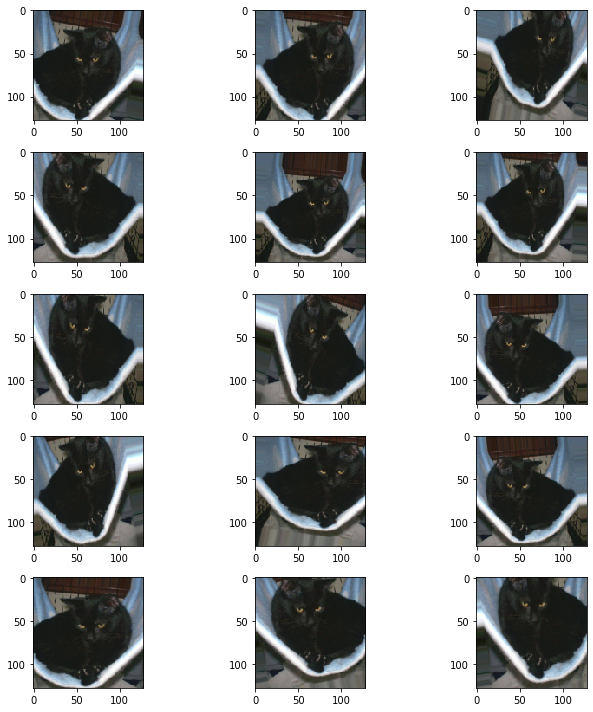

In [20]:
plt.figure(figsize = (10, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i + 1)
    for X_batch, Y_batch in subset_gen:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [21]:
epochs = 50 
history = model.fit_generator(
    train_generator, 
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_examples // batch_size,
    steps_per_epoch = training_examples // batch_size,
    callbacks = callbacks
)


Epoch 1/50
1333/1333 [==============================] - 745s 559ms/step - loss: 0.6804 - acc: 0.6259 - val_loss: 0.6308 - val_acc: 0.6395
Epoch 2/50
1333/1333 [==============================] - 727s 545ms/step - loss: 0.5635 - acc: 0.7056 - val_loss: 1.0457 - val_acc: 0.5165
Epoch 3/50
1333/1333 [==============================] - 729s 547ms/step - loss: 0.5193 - acc: 0.7382 - val_loss: 0.5074 - val_acc: 0.7545
Epoch 4/50
1333/1333 [==============================] - 739s 554ms/step - loss: 0.4708 - acc: 0.7738 - val_loss: 0.4493 - val_acc: 0.7922
Epoch 5/50
1333/1333 [==============================] - 743s 557ms/step - loss: 0.4482 - acc: 0.7892 - val_loss: 0.5888 - val_acc: 0.6978
Epoch 6/50
1333/1333 [==============================] - 740s 555ms/step - loss: 0.4268 - acc: 0.8000 - val_loss: 0.9310 - val_acc: 0.6365
Epoch 7/50
1333/1333 [==============================] - 736s 552ms/step - loss: 0.4177 - acc: 0.8093 - val_loss: 0.4080 - val_acc: 0.8137
Epoch 8/50
1333/1333 [============

In [22]:
model.save_weights("cat_dog_weights.h5")

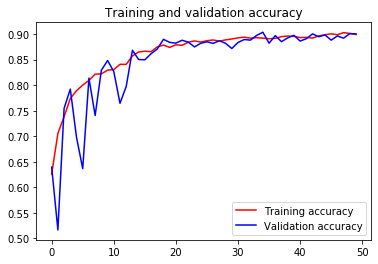

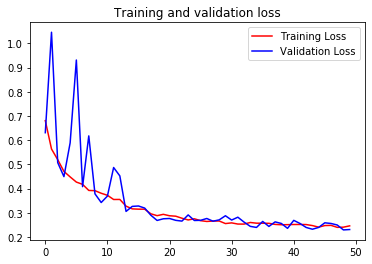

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
test_filenames = os.listdir(str(os.getcwd())+'/Datasets/test')
test_df = pd.DataFrame({
    'file': test_filenames
})

testing_examples = test_df.shape[0]
testing_examples

12500

In [42]:
test_df.head()

,file
0,9733.jpg
1,63.jpg
2,6400.jpg
3,823.jpg
4,4217.jpg


In [43]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)


test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    str(os.getcwd())+'/Datasets/test', 
    x_col = 'file',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

Found 12500 validated image filenames.


In [44]:
predict_category = model.predict_generator(test_generator, steps = np.ceil(testing_examples/batch_size))


In [45]:
# Since the prediction will be in probabilities we'll pick out the ones with highest probability
test_df['category'] = np.argmax(predict_category, axis=-1)

#We will convert the predict category back into our generator classes by using train_generator.class_indices. 
#It is the classes that image generator map while converting data into computer vision
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

'''# From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. 
# Now we will map the result back to dog is 1 and cat is 0
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })
'''

test_df['category'].value_counts()

0    6430
1    6070
Name: category, dtype: int64

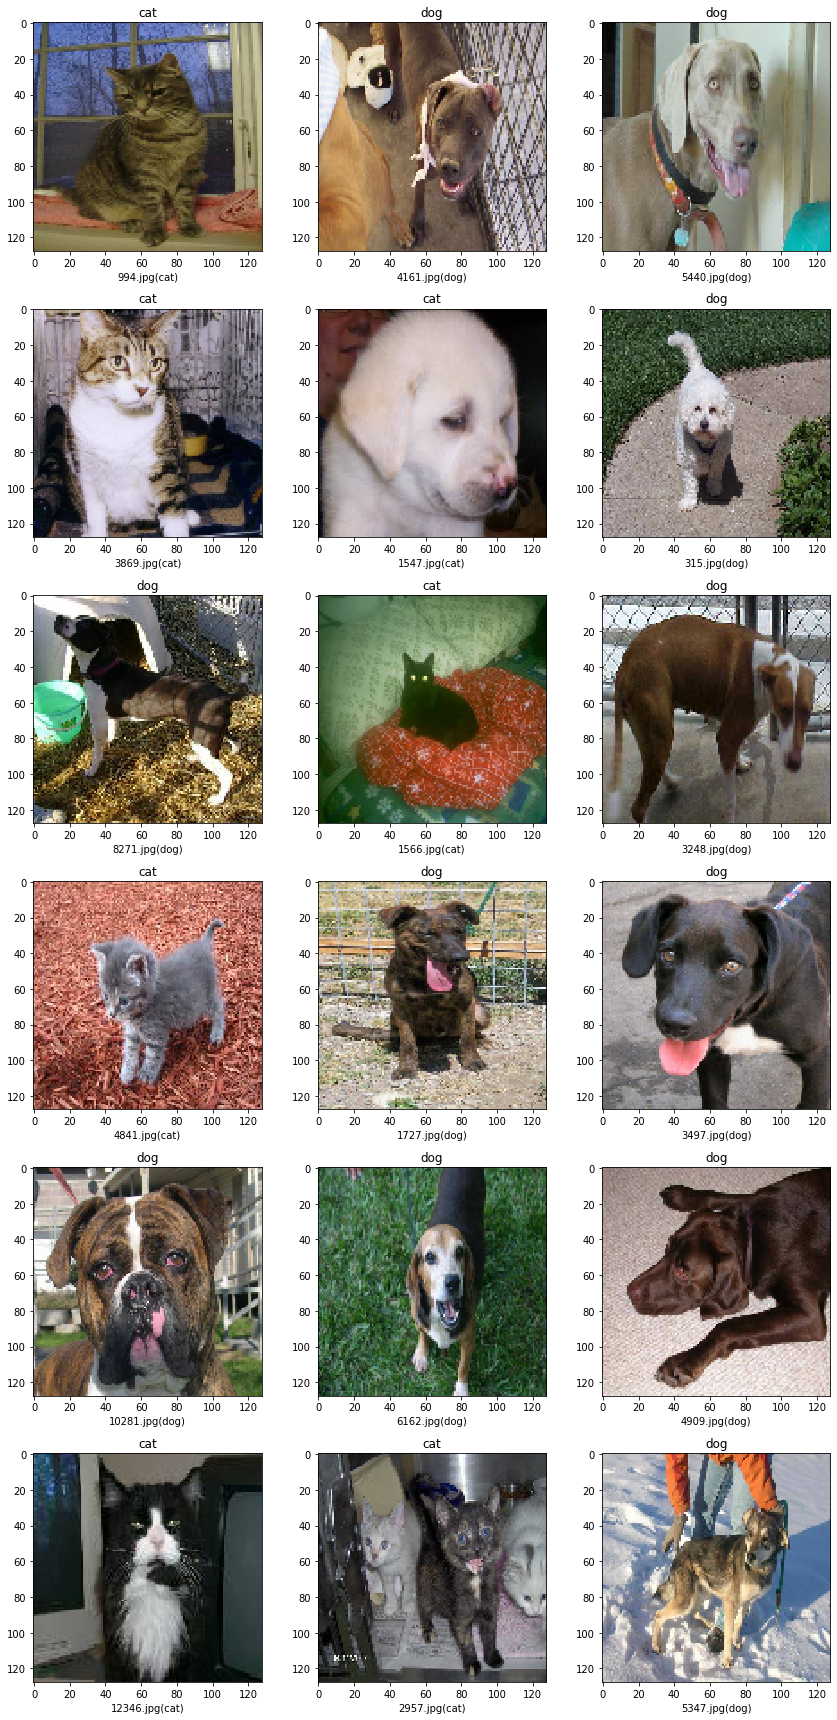

In [64]:
sample_test = test_df.sample(n = 18)
sample_test['category'] = sample_test['category'].replace({ 1 : 'dog', 0 : 'cat' })

plt.figure(figsize=(12, 24))
i = 0

for index, row in sample_test.iterrows():
    filename = row['file']
    category = row['category']
    img = load_img(str(os.getcwd())+'/Datasets/test/' + filename, target_size = IMAGE_SIZE)
    plt.subplot(6, 3, i + 1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
    plt.title(row[1])
    i += 1
plt.tight_layout()
plt.show()

In [65]:
# we can see that out of the 18 pictures classified only one got misclassified 